# import Library

In [2]:
import pandas as pd # dataframe
import seaborn as sns # for visualization
import matplotlib.pyplot as plt # for visualization
%matplotlib inline # for jupyter notebook to show the figures

# read csv file and use the first column as index

In [28]:
df = pd.read_csv("LTC_selected_features.csv",index_col=0)

In [29]:
df.head()

,Peptide_27,Fasting_plasma_glucose_(mmol/l),HbA1c,Fasting_plasma_insulin_(pmol/l),C-Peptide_(nmol/l),HOMA-IR,Free_fatty_acids_(mmol/l),Class
SampleID,,,,,,,,
3,10.42,4.73,6.5,121.4,1.63,3.7,1.03,1
5,102.86,7.16,7.6,226.0,1.11,10.4,0.98,1
6,9.84,5.06,4.9,39.7,0.75,1.3,0.35,0
7,41.03,5.35,6.3,203.3,2.02,7.0,1.17,1
8,12.30,5.37,5.6,50.8,1.19,1.7,0.32,0


# Above is the pandas DataFrame structure, you need to be very familiar about it

# Example of usage shown below

In [30]:
df.at[3,'Peptide_27'] # access a number

10.42

In [31]:
df.loc[3] # selecting a row

Peptide_27                          10.42
Fasting_plasma_glucose_(mmol/l)      4.73
HbA1c                                6.50
Fasting_plasma_insulin_(pmol/l)    121.40
C-Peptide_(nmol/l)                   1.63
HOMA-IR                              3.70
Free_fatty_acids_(mmol/l)            1.03
Class                                1.00
Name: 3, dtype: float64

In [32]:
df['Peptide_27'] # selecting a column

SampleID
3       10.42
5      102.86
6        9.84
7       41.03
8       12.30
9        7.93
10      25.75
11      50.73
12      12.33
13      27.82
14      79.75
15      32.91
16      61.47
17      32.85
18      77.79
19      14.51
20      63.48
21      76.33
22       7.89
23      53.11
24      33.81
25      17.82
26      32.75
27      15.63
28      41.24
29      12.81
30      64.15
31      24.83
32      52.38
33      57.91
        ...  
70      27.96
71      25.79
72      12.73
73      46.41
74      31.48
75      99.34
76      61.31
77      14.05
78      48.31
79      23.41
80      30.74
81      62.07
82      18.59
83      13.86
84      16.91
85      20.30
86      39.20
87      15.87
88      35.83
89      56.46
90      74.14
91      28.77
92      11.74
93      18.06
94      10.75
96       7.58
97      19.24
98      20.19
99      17.75
100     26.92
Name: Peptide_27, Length: 96, dtype: float64

In [33]:
df_norm = df/df.max()

In [41]:
NGT = pd.melt(df_norm[df_norm['Class'] == 0],value_vars=df_norm.columns[:-1])
NGT['class'] = "NGT"
NGT.head()

,variable,value,class
0,Peptide_27,0.085856,NGT
1,Peptide_27,0.107320,NGT
2,Peptide_27,0.069191,NGT
3,Peptide_27,0.224675,NGT
4,Peptide_27,0.442632,NGT


In [42]:
T2D = pd.melt(df_norm[df_norm['Class'] == 1],value_vars=df_norm.columns[:-1])
T2D['class'] = "T2D"
T2D.head()

,variable,value,class
0,Peptide_27,0.090917,T2D
1,Peptide_27,0.897478,T2D
2,Peptide_27,0.357997,T2D
3,Peptide_27,0.695838,T2D
4,Peptide_27,0.287148,T2D


In [43]:
plot_df = pd.concat([T2D,NGT])
plot_df.head()

,variable,value,class
0,Peptide_27,0.090917,T2D
1,Peptide_27,0.897478,T2D
2,Peptide_27,0.357997,T2D
3,Peptide_27,0.695838,T2D
4,Peptide_27,0.287148,T2D


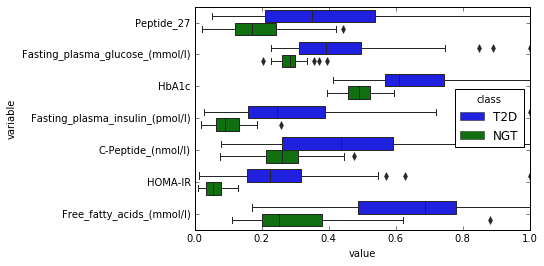

In [48]:

sns.boxplot(y='variable',x='value',hue='class',data=plot_df)
